# Run on existing model

In [1]:
# connect with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Installation**

In [2]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!git clone https://github.com/sourabmaity/Mask_RCNN.git

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 29.6 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 38 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [3]:
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

VERS 0.2


Using TensorFlow backend.


... done downloading pretrained model!


In [4]:
!nvidia-smi

Sat Jul  2 11:43:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **2. Run Mask-RCNN on Images**

You can load here the image and extract the mask using Mask-RCNN


In [5]:
# specify some details
num_classes=2
name_classes=['backGround','cone','iceCream']  # backGround is constant at position 0 change others

In [6]:
test_model, inference_config = load_inference_model(num_classes, "/content/drive/MyDrive/InstantSegmentationModel/mask_rcnn_object_0005.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/InstantSegmentationModel/mask_rcnn_object_0005.h5


In [8]:
# Load Image
img = cv2.imread("/content/birthday-cake-ice-cream-cone-1-of-1.jpg")

# change BGR to RGB
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

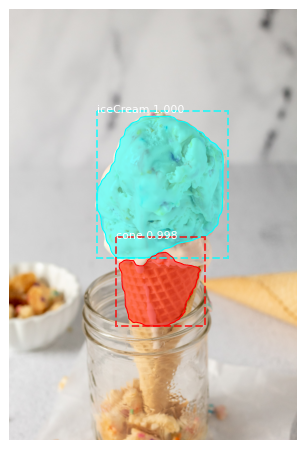

In [9]:
# Annotation / Mask  run this if you know class names of the model
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                                name_classes, r['scores'], ax=get_ax())  # show_bbox=False


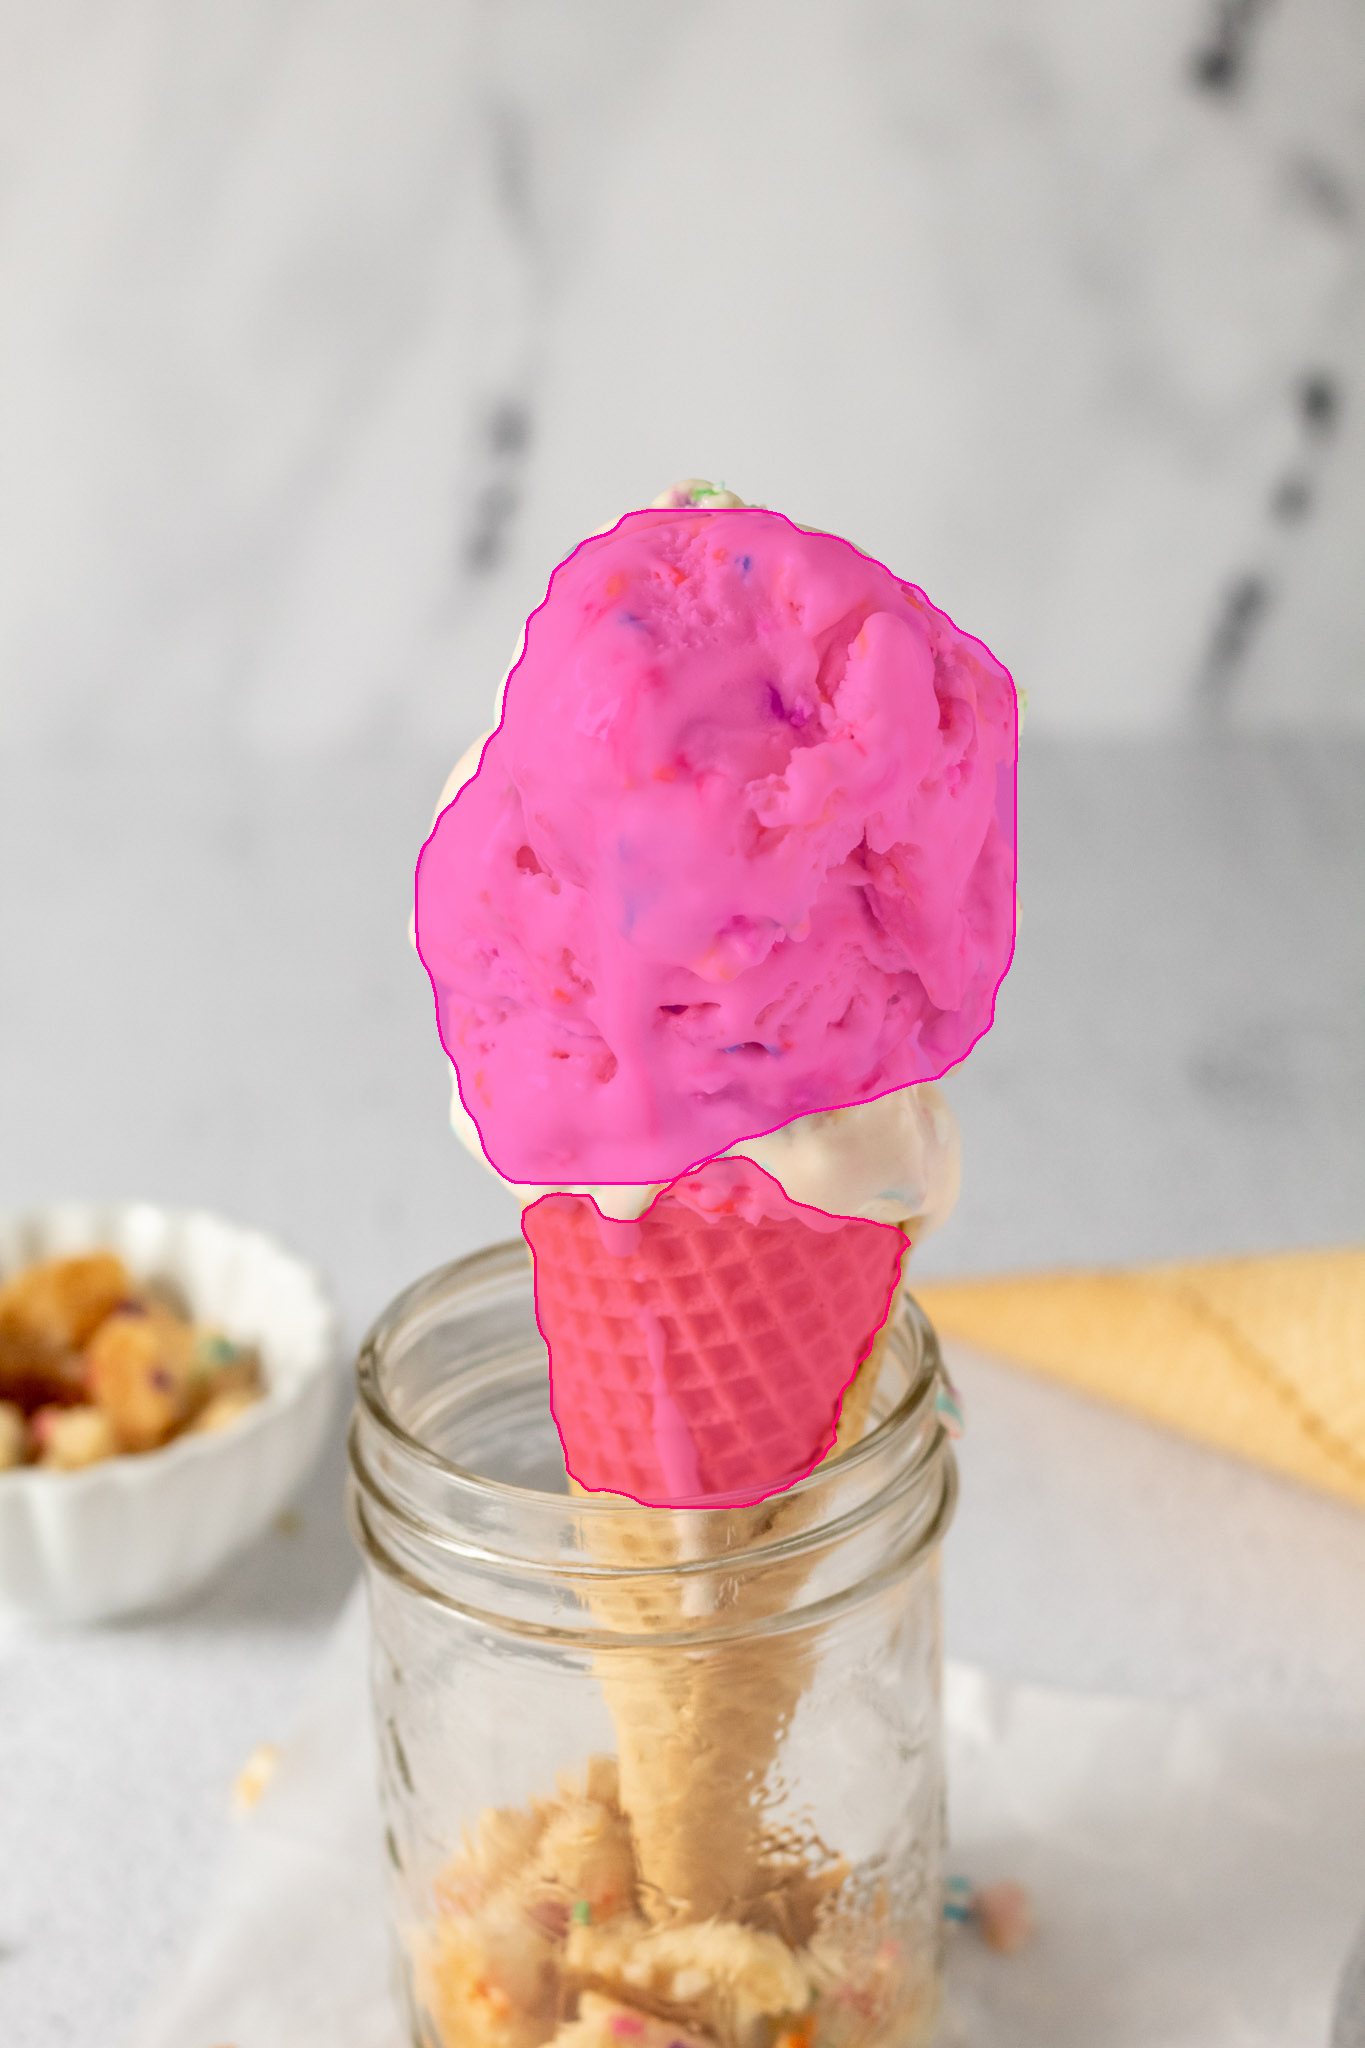

In [10]:
# run this if you dont know class names of the model
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

cv2_imshow(img)